## Feature Scaling
- normalization
- standardization

In [3]:
import pandas as pd

In [1]:
#!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data -o "./data/wine.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 10782    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 10782  100 10782    0     0  11126      0 --:--:-- --:--:-- --:--:-- 11126


In [21]:
#df = pd.read_csv('./data/wine.csv', header=None)
#df.columns = ['Wines', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
#             'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
#             'OD280 OD315 of diluted wines', 'Proline']
#df.head()
#df.to_csv('./data/wine.tsv', header=True, index=False, sep='\t')

In [56]:
df_orig = pd.read_csv('./data/wine.tsv', delimiter='\t')
df_orig.head()

,Wines,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280 OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Data Cleansing

In [57]:
df = df_orig.copy()
print(df.shape)
df = df.dropna()
df = df.drop_duplicates()
print(df.shape)

(178, 14)
(178, 14)


## Data Partitioning: `train_test_split`

In [72]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df['Wines'], test_size=0.4, random_state=0)
print(X_train.shape)
print(y_train.shape)
X_train.head()

(106, 13)
(106,)


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280 OD315 of diluted wines,Proline
43,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.360000,0.82,3.00,680
10,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.750000,1.25,3.17,1510
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.650000,0.96,3.26,680
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.350000,1.31,3.50,985
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470


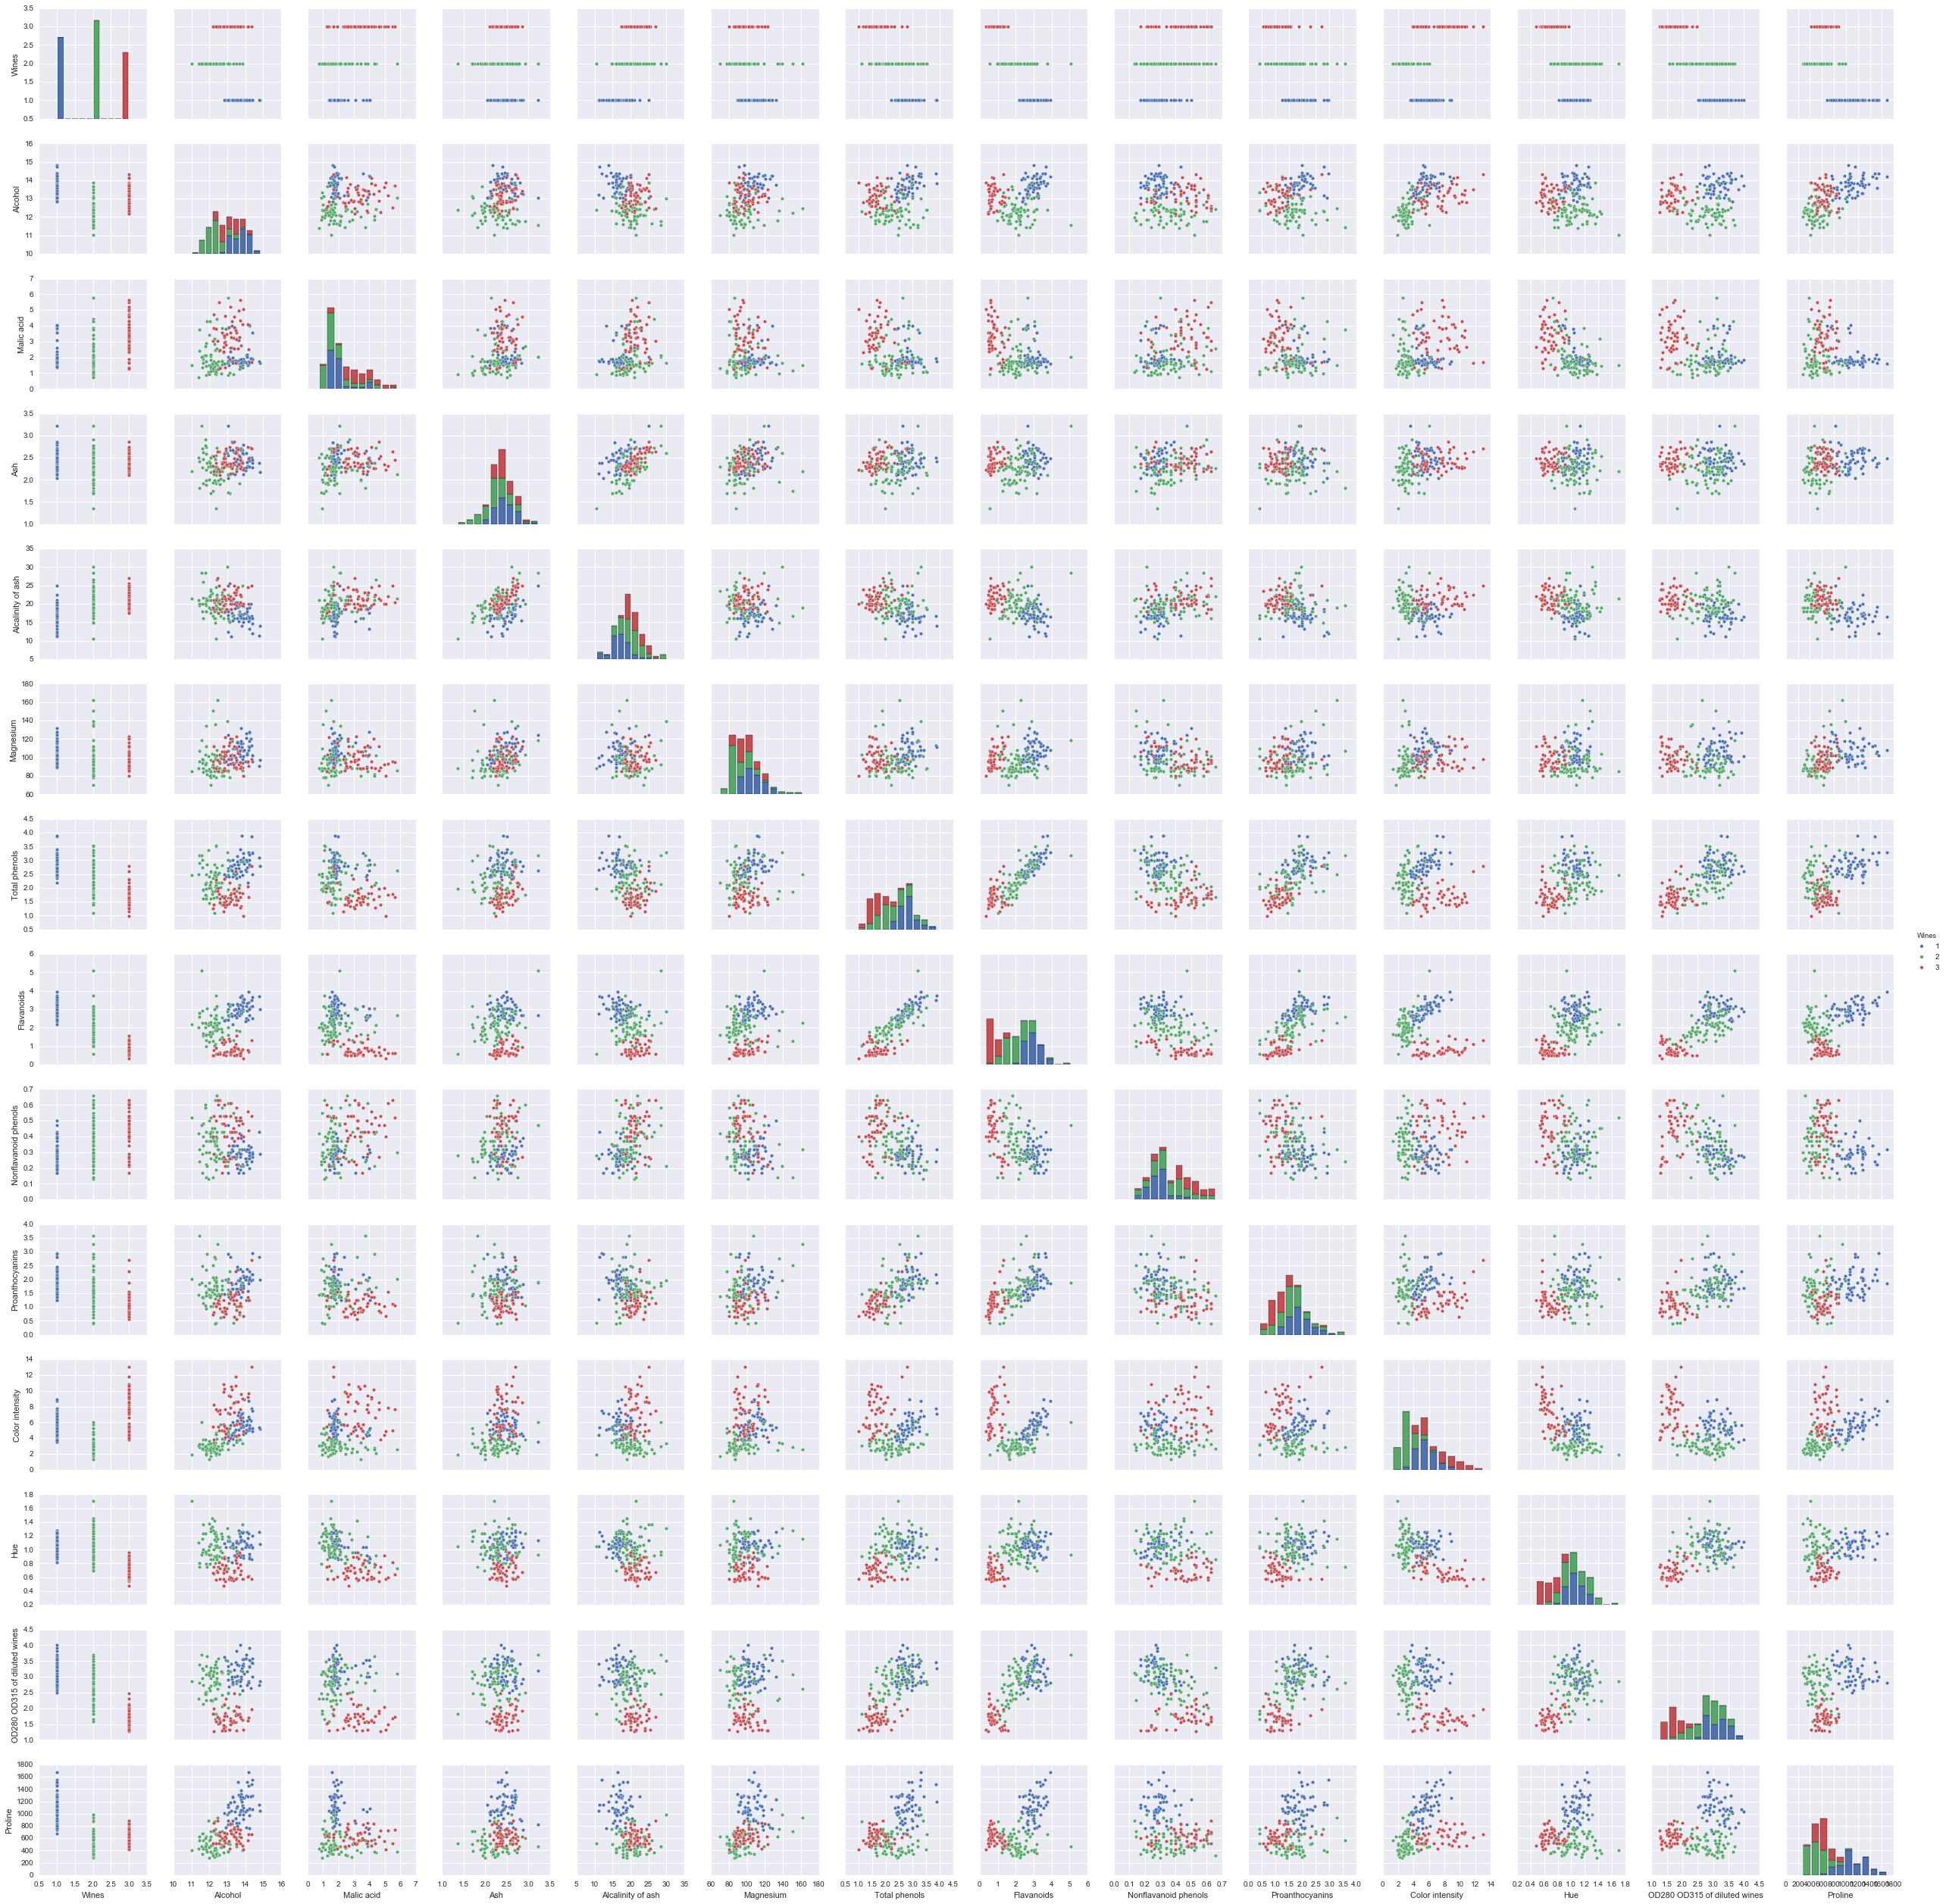

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data=df, hue='Wines')

## Feature Scaling by Normalisation: `MinMaxScaler`

In [68]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

In [118]:
X_train_norm_df = pd.DataFrame(X_train_norm, columns=[df.columns[1:]]) # only for the sake of pretty printing
X_train_norm_df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280 OD315 of diluted wines,Proline
0,0.594086,0.649160,0.388158,0.335106,0.407407,0.553957,0.660550,0.346154,0.392405,0.294174,0.239316,0.652830,0.296266
1,0.825269,0.266807,0.394737,0.361702,0.432099,0.665468,0.871560,0.153846,0.620253,0.426934,0.606838,0.716981,0.969968
2,0.155914,0.096639,0.657895,0.468085,0.296296,0.589928,0.749235,0.288462,0.655063,0.130850,0.358974,0.750943,0.296266
3,0.526882,0.163866,0.592105,1.000000,0.851852,0.791367,0.740061,0.134615,0.487342,0.197708,0.658120,0.841509,0.543831
4,0.467742,0.315126,0.381579,0.441489,0.197531,0.104317,0.012232,0.653846,0.069620,0.823305,0.025641,0.135849,0.125812
5,0.658602,0.163866,0.618421,0.601064,0.234568,0.539568,0.192661,0.730769,0.591772,1.000000,0.025641,0.192453,0.247565
6,0.115591,0.598739,0.078947,0.441489,0.456790,0.748201,0.645260,0.192308,1.000000,0.154728,0.179487,0.581132,0.200487
7,0.279570,0.266807,0.309211,0.521277,0.185185,0.539568,0.666667,0.442308,0.294304,0.141356,0.273504,0.758491,0.051136
8,0.212366,0.121849,0.190789,0.510638,0.197531,0.316547,0.345566,0.307692,0.351266,0.063992,0.350427,0.777358,0.146104
9,0.650538,0.590336,0.592105,0.627660,0.506173,0.215827,0.137615,0.557692,0.329114,0.897803,0.264957,0.109434,0.308442


In [127]:
y_df = pd.DataFrame(y_train, columns=['Wines']).reset_index(drop=True)
y_df.head()

,Wines
0,1
1,1
2,2
3,2
4,3


In [131]:
print(X_train_norm_df.shape)
print(y_train.shape)
df_norm = X_train_norm_df.copy()
df_norm = pd.concat([y_df, df_norm], axis=1)
print(df_norm.shape)
df_norm

(106, 13)
(106,)
(106, 14)


,Wines,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280 OD315 of diluted wines,Proline
0,1,0.594086,0.649160,0.388158,0.335106,0.407407,0.553957,0.660550,0.346154,0.392405,0.294174,0.239316,0.652830,0.296266
1,1,0.825269,0.266807,0.394737,0.361702,0.432099,0.665468,0.871560,0.153846,0.620253,0.426934,0.606838,0.716981,0.969968
2,2,0.155914,0.096639,0.657895,0.468085,0.296296,0.589928,0.749235,0.288462,0.655063,0.130850,0.358974,0.750943,0.296266
3,2,0.526882,0.163866,0.592105,1.000000,0.851852,0.791367,0.740061,0.134615,0.487342,0.197708,0.658120,0.841509,0.543831
4,3,0.467742,0.315126,0.381579,0.441489,0.197531,0.104317,0.012232,0.653846,0.069620,0.823305,0.025641,0.135849,0.125812
5,3,0.658602,0.163866,0.618421,0.601064,0.234568,0.539568,0.192661,0.730769,0.591772,1.000000,0.025641,0.192453,0.247565
6,2,0.115591,0.598739,0.078947,0.441489,0.456790,0.748201,0.645260,0.192308,1.000000,0.154728,0.179487,0.581132,0.200487
7,2,0.279570,0.266807,0.309211,0.521277,0.185185,0.539568,0.666667,0.442308,0.294304,0.141356,0.273504,0.758491,0.051136
8,2,0.212366,0.121849,0.190789,0.510638,0.197531,0.316547,0.345566,0.307692,0.351266,0.063992,0.350427,0.777358,0.146104
9,3,0.650538,0.590336,0.592105,0.627660,0.506173,0.215827,0.137615,0.557692,0.329114,0.897803,0.264957,0.109434,0.308442


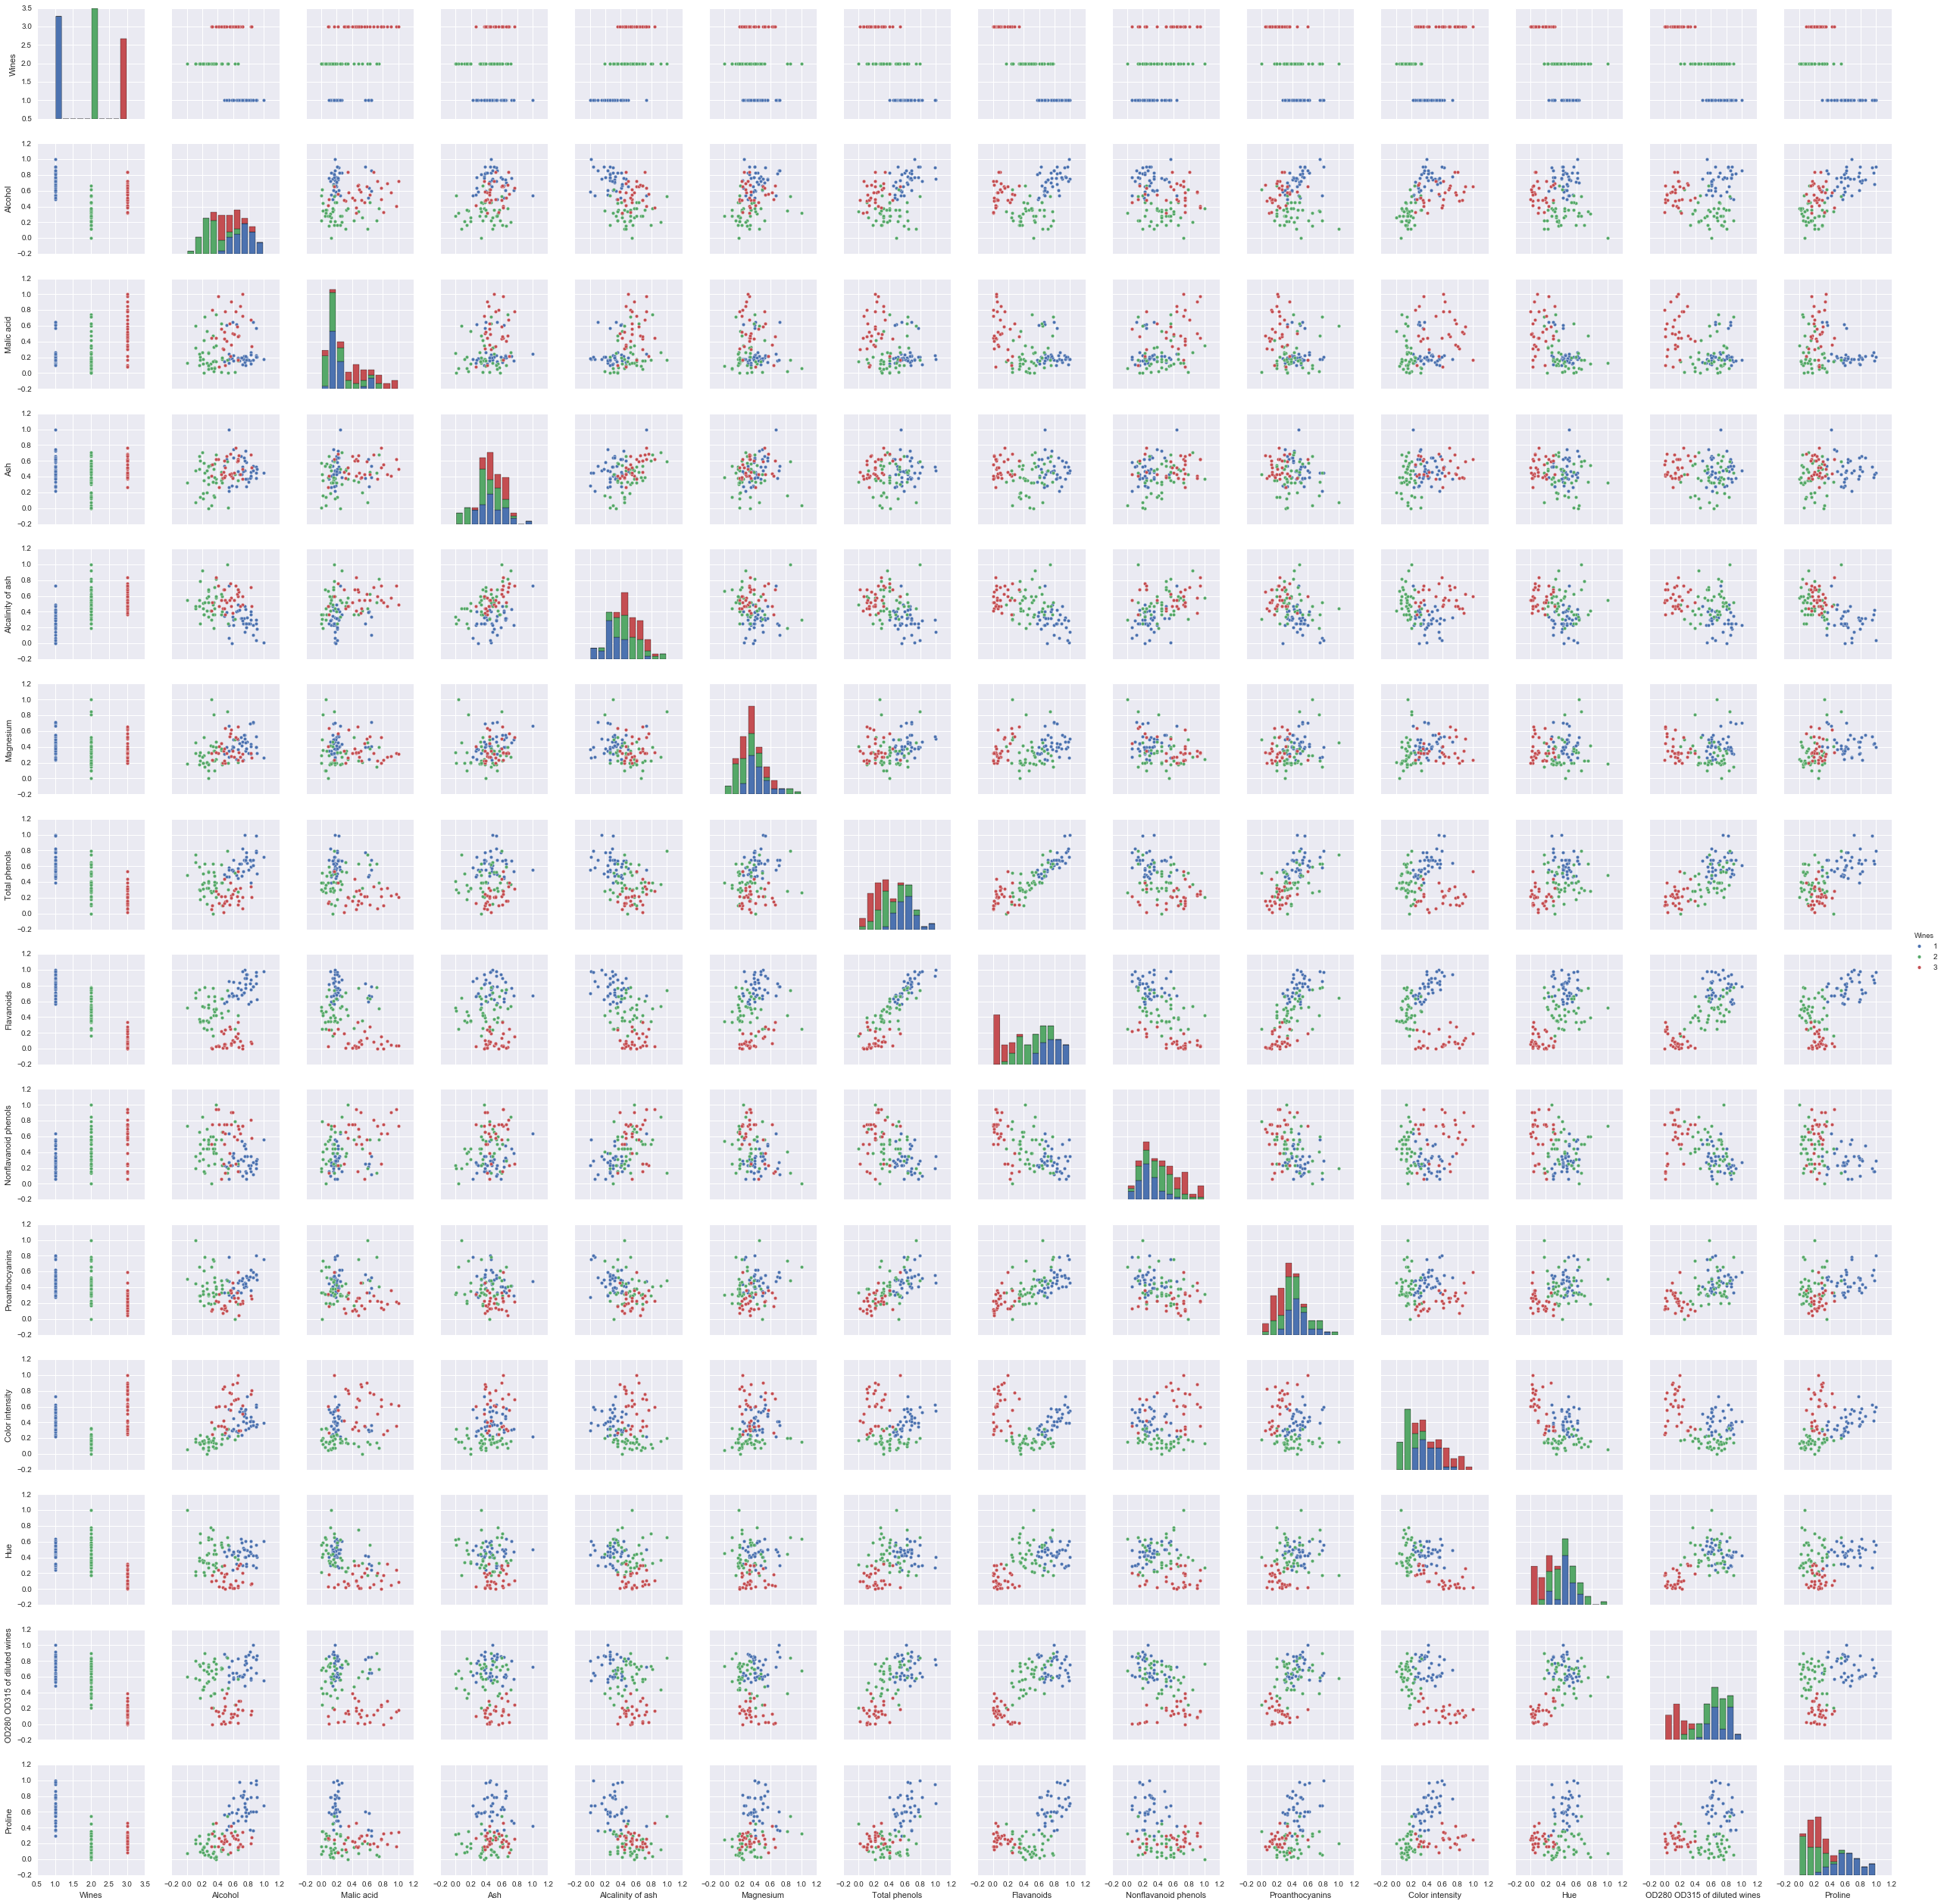

In [132]:
sns.pairplot(data=df_norm, hue='Wines')

## Feature Scaling by Standardization: `StandardScaler`

In [40]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_stdsc = stdsc.fit_transform(X_train)
X_test_stdsc = stdsc.fit_transform(X_train)

In [137]:
X_train_stdsc_df = pd.DataFrame(X_train_stdsc, columns=[df.columns[1:]]) # only for the sake of pretty printing

In [139]:
df_stdsc = X_train_stdsc_df.copy()
df_stdsc = pd.concat([y_df, df_stdsc], axis=1)
df_stdsc.head()

,Wines,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280 OD315 of diluted wines,Proline
0,1,0.305063,1.408644,-0.364804,-0.592700,0.221727,0.570407,0.611039,-0.345558,0.055177,-0.306305,-0.605196,0.495501,-0.248799
1,1,1.342344,-0.194634,-0.326289,-0.454862,0.370012,1.078914,1.324049,-1.163172,1.301057,0.280956,1.233057,0.731904,2.412522
2,2,-1.660948,-0.908180,1.214319,0.096486,-0.445553,0.734442,0.910710,-0.590842,1.491400,-1.028762,-0.006695,0.857059,-0.248799
3,2,0.003527,-0.626285,0.829167,2.853228,2.890848,1.653035,0.879710,-1.244933,0.574293,-0.733019,1.489558,1.190804,0.729156
4,3,-0.261824,0.007978,-0.403320,-0.041351,-1.038691,-1.480025,-1.579656,0.962625,-1.709820,2.034287,-1.673948,-1.409627,-0.922146


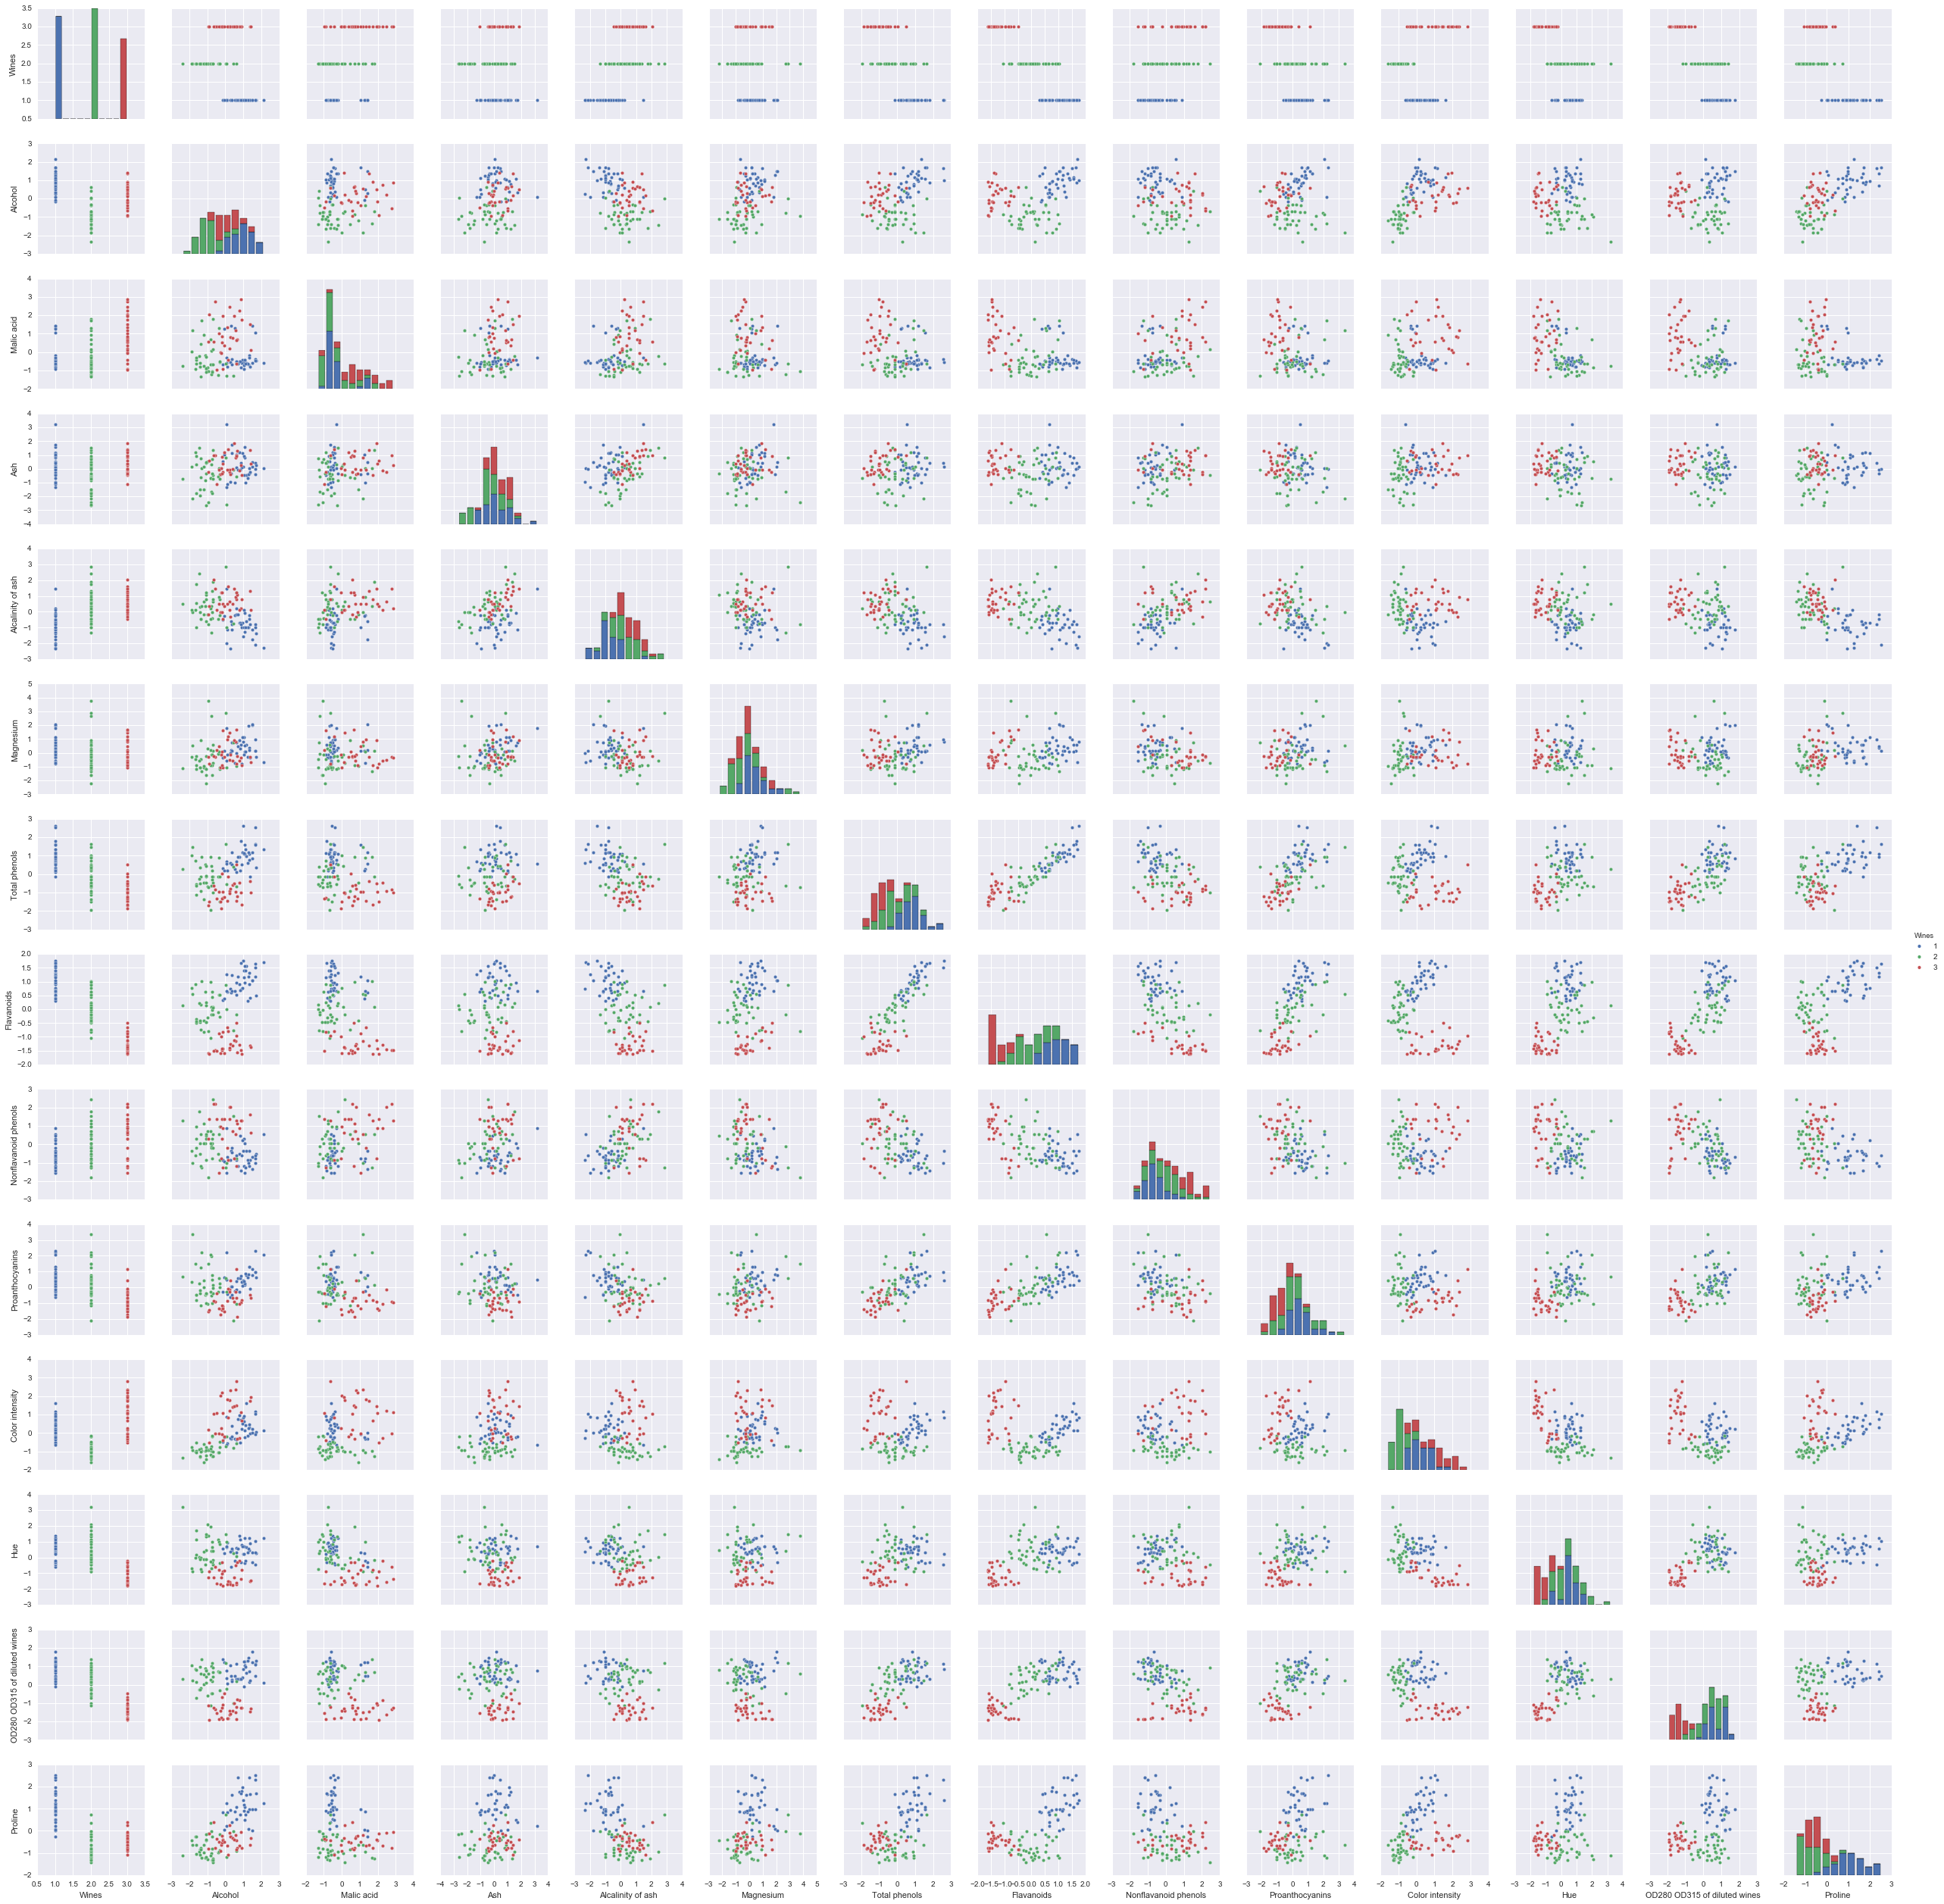

In [141]:
sns.pairplot(data=df_stdsc, hue='Wines')